# Import library

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import seaborn as sns
import scipy
from scipy.stats import pearsonr

import sklearn
from sklearn import datasets, linear_model
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

# Load Datasets

In [2]:
# Please change the file path to the location that where the concrete dataset located.
all_df=pd.read_csv("Data_for_UCI_named.csv",index_col=False)
all_df.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable


# Dataset Information

In [3]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tau1    10000 non-null  float64
 1   tau2    10000 non-null  float64
 2   tau3    10000 non-null  float64
 3   tau4    10000 non-null  float64
 4   p1      10000 non-null  float64
 5   p2      10000 non-null  float64
 6   p3      10000 non-null  float64
 7   p4      10000 non-null  float64
 8   g1      10000 non-null  float64
 9   g2      10000 non-null  float64
 10  g3      10000 non-null  float64
 11  g4      10000 non-null  float64
 12  stab    10000 non-null  float64
 13  stabf   10000 non-null  object 
dtypes: float64(13), object(1)
memory usage: 1.1+ MB


In [4]:
all_df.describe()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5.250000,5.250001,5.250004,5.249997,3.750000,-1.250000,-1.250000,-1.250000,0.525000,0.525000,0.525000,0.525000,0.015731
std,2.742548,2.742549,2.742549,2.742556,0.752160,0.433035,0.433035,0.433035,0.274256,0.274255,0.274255,0.274255,0.036919
min,0.500793,0.500141,0.500788,0.500473,1.582590,-1.999891,-1.999945,-1.999926,0.050009,0.050053,0.050054,0.050028,-0.080760
25%,2.874892,2.875140,2.875522,2.874950,3.218300,-1.624901,-1.625025,-1.624960,0.287521,0.287552,0.287514,0.287494,-0.015557
50%,5.250004,5.249981,5.249979,5.249734,3.751025,-1.249966,-1.249974,-1.250007,0.525009,0.525003,0.525015,0.525002,0.017142
75%,7.624690,7.624893,7.624948,7.624838,4.282420,-0.874977,-0.875043,-0.875065,0.762435,0.762490,0.762440,0.762433,0.044878
max,9.999469,9.999837,9.999450,9.999443,5.864418,-0.500108,-0.500072,-0.500025,0.999937,0.999944,0.999982,0.999930,0.109403


In [5]:
all_df['stabf'].value_counts()

unstable    6380
stable      3620
Name: stabf, dtype: int64

<AxesSubplot:xlabel='stabf', ylabel='count'>

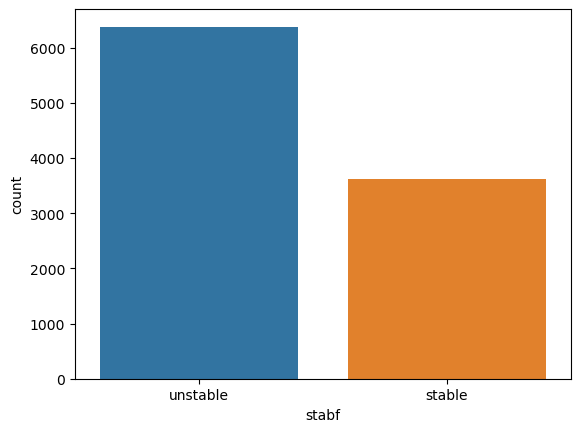

In [6]:
sns.countplot(x="stabf", data=all_df)

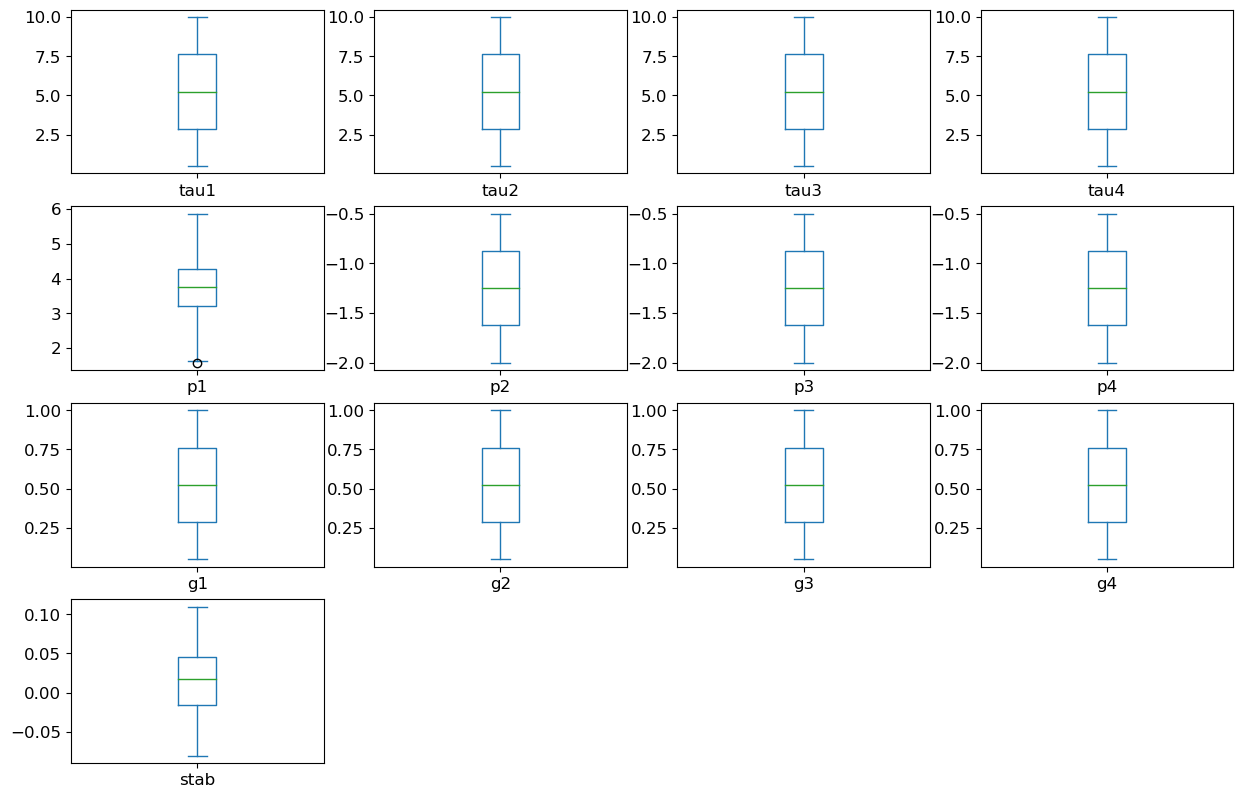

In [7]:
data_mean = all_df.iloc[:, :]
data_mean.plot(kind='box', subplots=True, layout=(8,4), sharex=False,
sharey=False, fontsize=12, figsize=(15,20));

<AxesSubplot:>

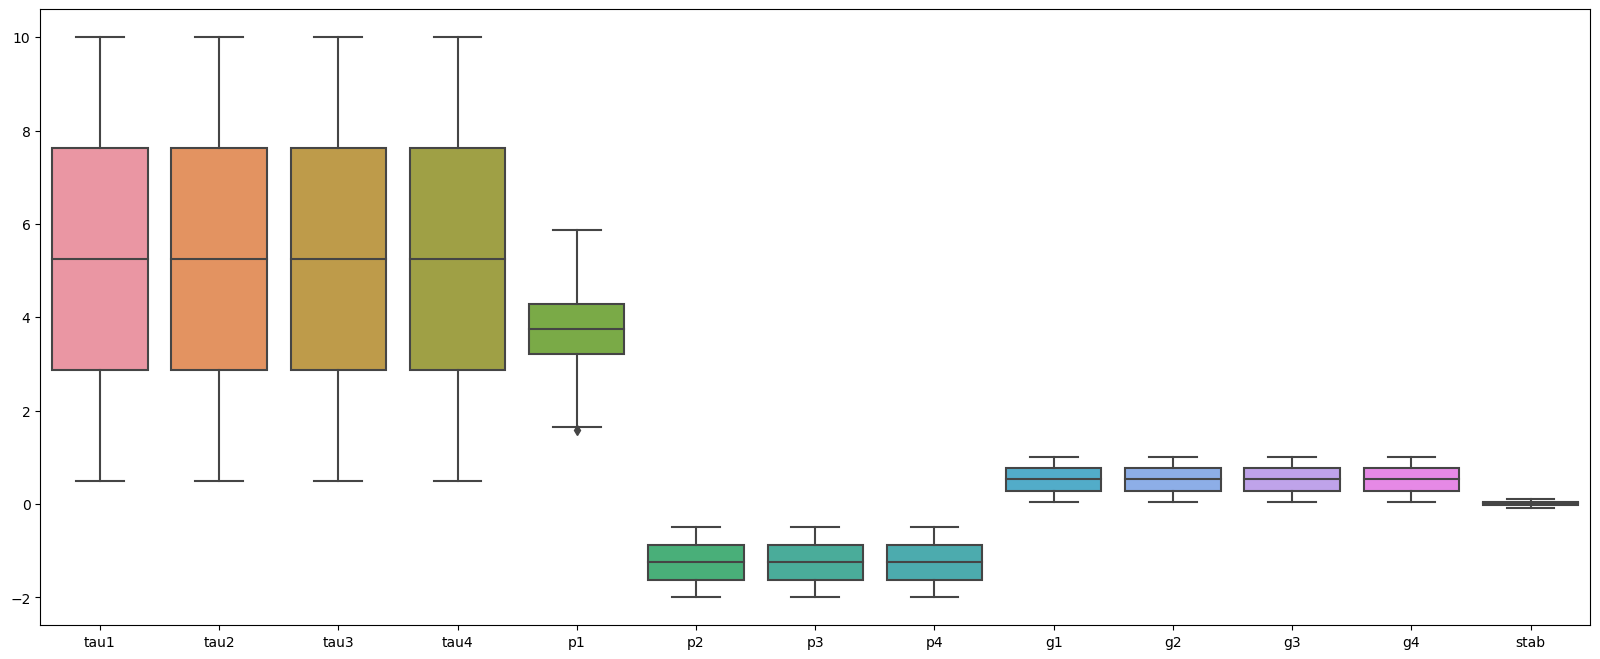

In [8]:
fig,ax=plt.subplots(1,figsize=(20,8))
sns.boxplot(data=all_df.iloc[:, 0:13],ax=ax) 

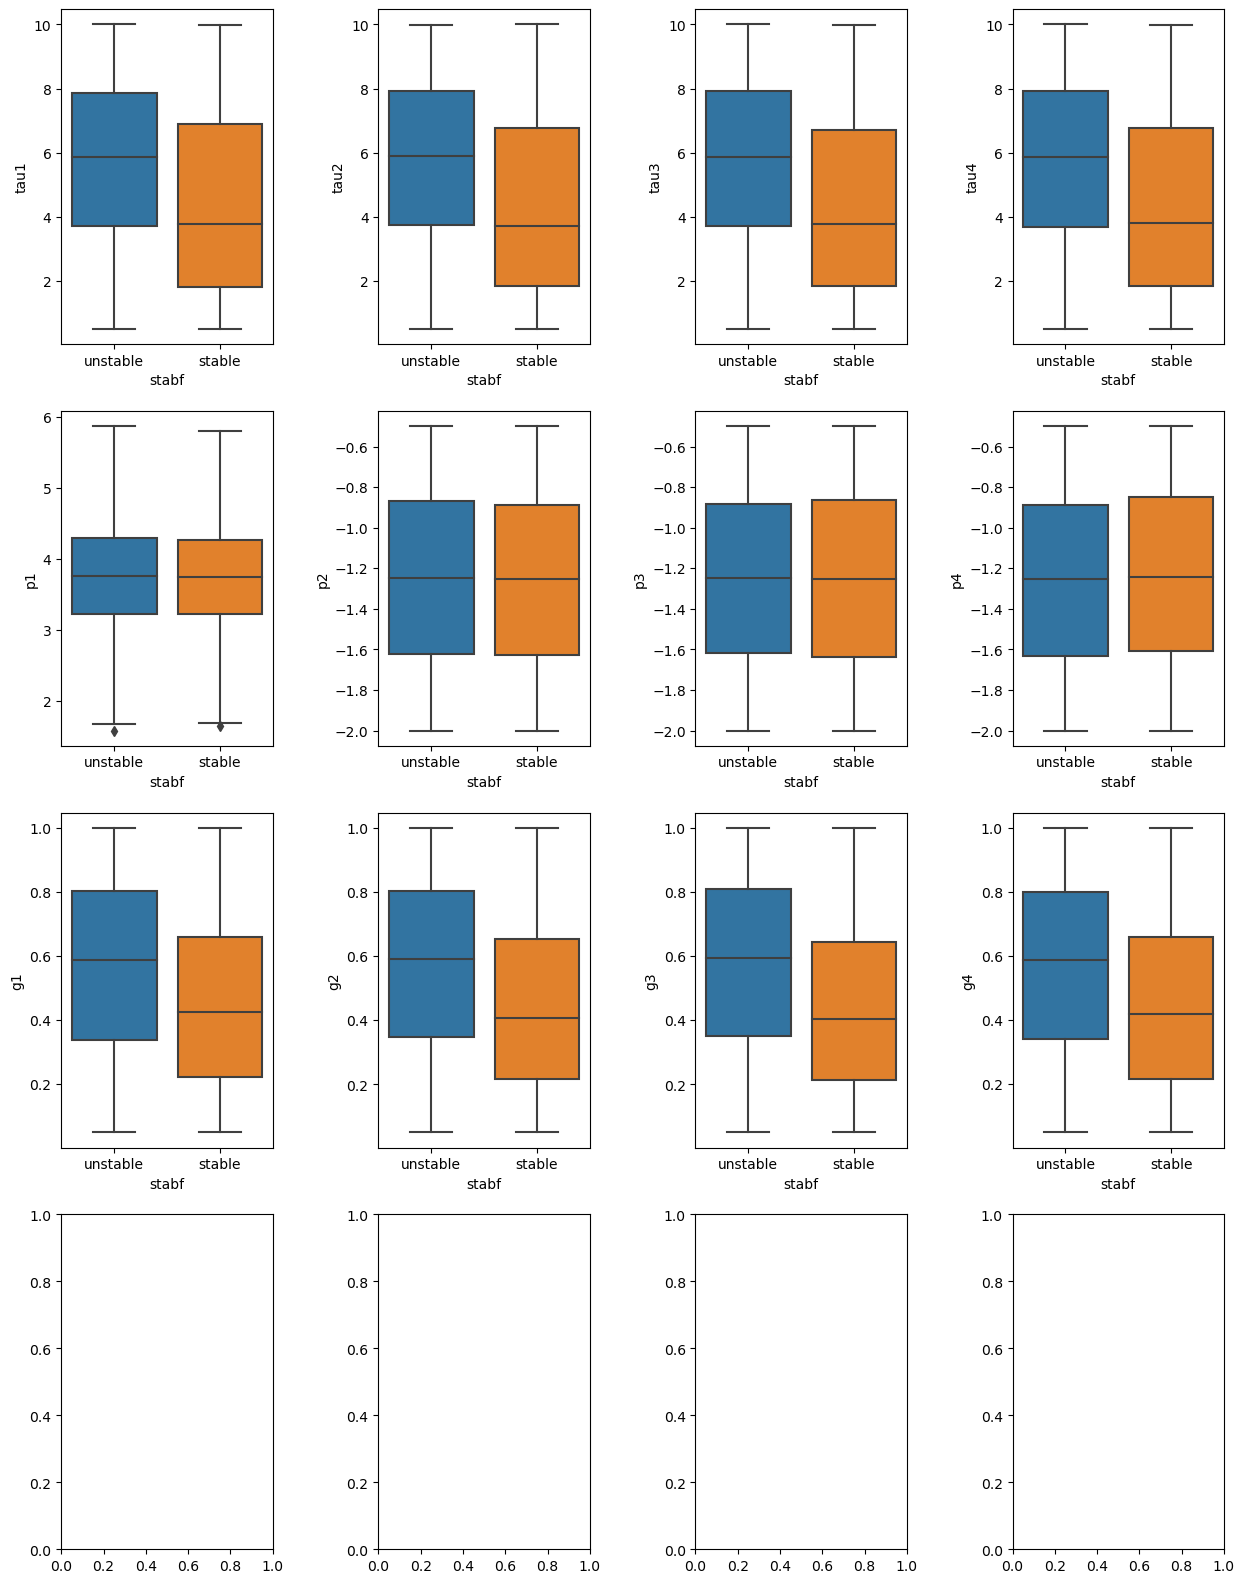

In [9]:
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(15,20))
fig.subplots_adjust(hspace =.2, wspace=.5)
axes = axes.ravel()
for i, col in enumerate(all_df.columns[:-2]):
    _= sns.boxplot(y=col, x='stabf', data=all_df, ax=axes[i])

# HeatMap

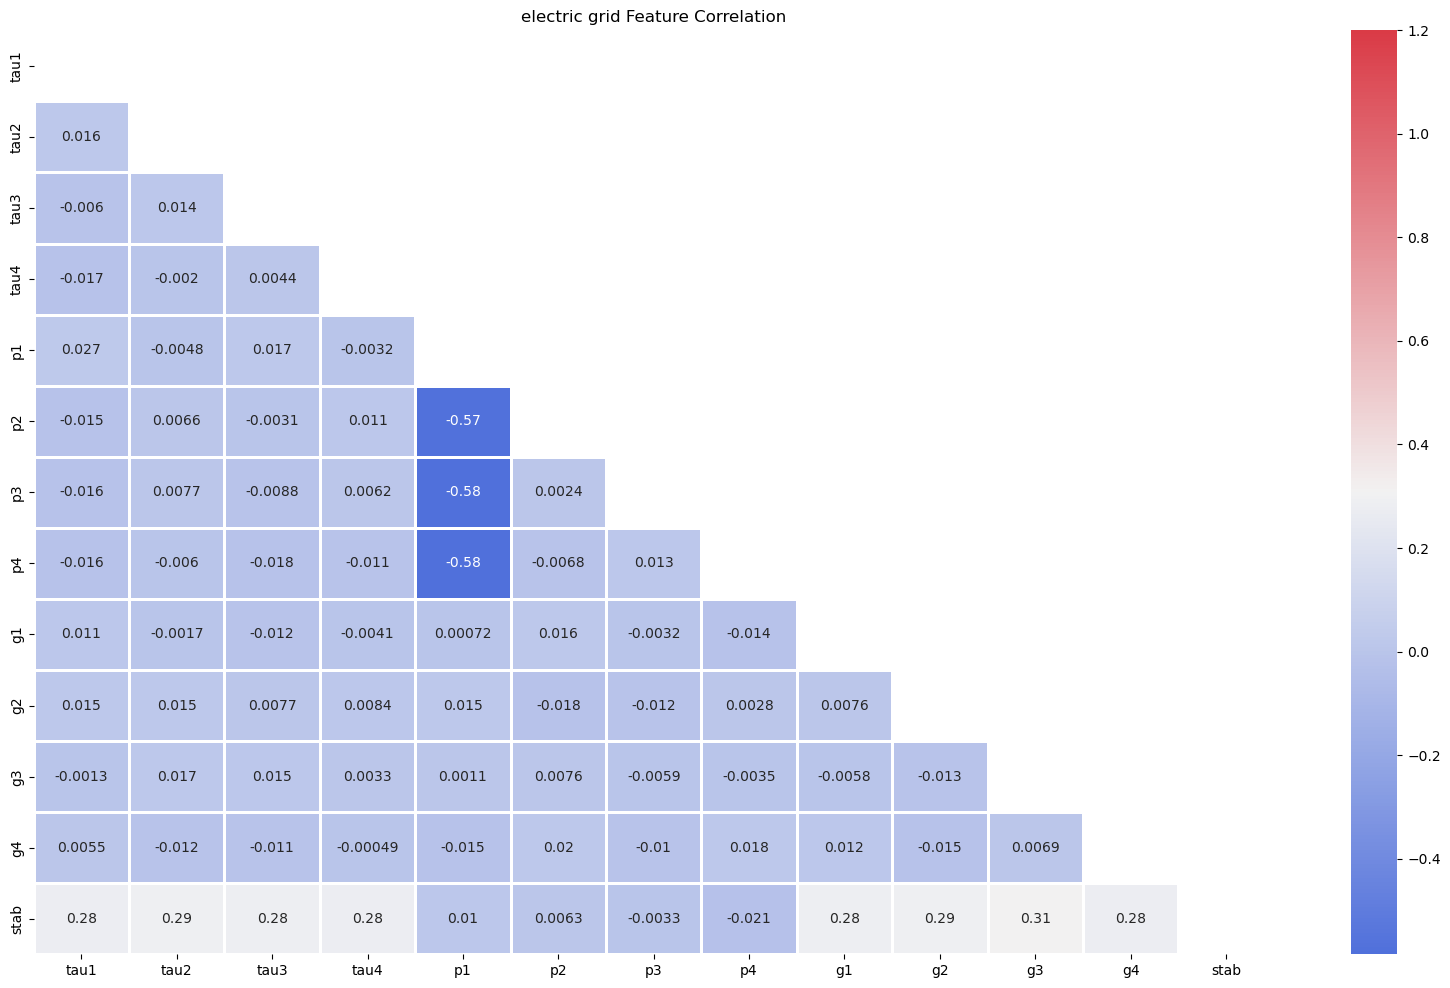

In [10]:
corrMatt = all_df.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corrMatt)
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(20, 12))
plt.title('electric grid Feature Correlation')
# Generate a custom diverging colormap
cmap = sns.diverging_palette(260, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corrMatt, vmax=1.2, square=False, cmap=cmap, mask=mask,
ax=ax, annot=True, fmt='.2g', linewidths=1);

# Data Cleaning and Preprocessing

In [11]:
# Remove the row that contain null values and duplicate data

all_df.dropna(inplace = True)
all_df.drop_duplicates(inplace = True)
all_df.shape

(10000, 14)

In [12]:
# Fucntion of determine the range of outlier based on lower and upper bound of the dataset

def outliers(df, ft):
    Q1 = df[ft].quantile(0.25)
    Q3 = df[ft].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    ls = df.index[(df[ft] < lower_bound) | (df[ft] > upper_bound)]
    
    return ls

In [13]:
# Function to remove the outlier that determine from the original dataset

def remove(df, ls):
    ls = sorted(set(ls))
    df = df.drop(ls)
    return df

In [14]:
index_list = []
for feature in ['tau1','tau2','tau3','tau4','p1','p2','p3','p4','g1','g2','g3','g4']:
    index_list.extend(outliers(all_df,feature))

In [15]:
all_df_cleaned = remove(all_df,index_list)

In [16]:
all_df_cleaned.shape

(9999, 14)

## Normalize data

In [17]:
X = all_df_cleaned.drop(['stabf','stab'],axis=1)

<AxesSubplot:>

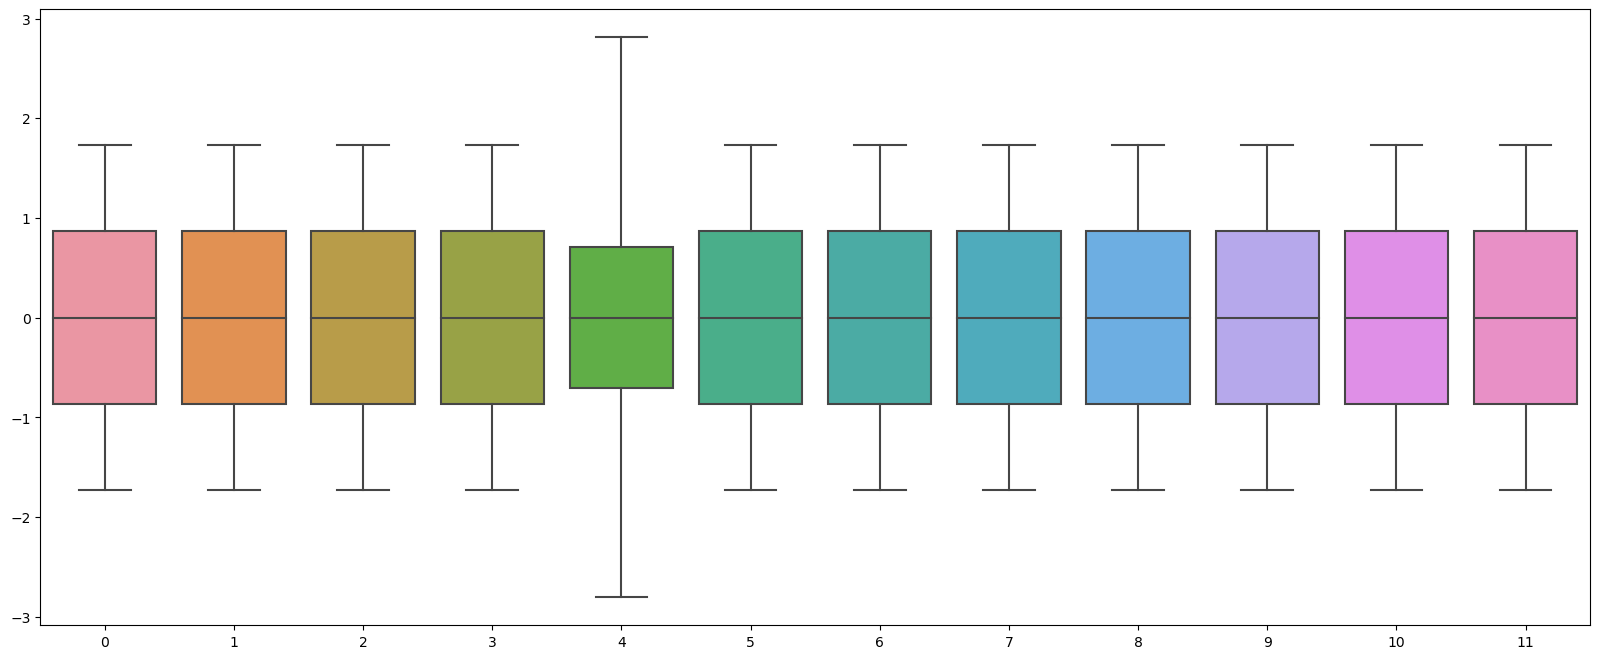

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Xs = scaler.fit_transform(X)
fig,ax=plt.subplots(1,figsize=(20,8))
sns.boxplot(data=Xs,ax=ax)

In [19]:
## Encode the target column to either 0 and 1 for classification

In [20]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
all_df_cleaned['stabf'] = le.fit_transform(all_df_cleaned['stabf'])
all_df.head()
# assign numerical label to y
y = all_df_cleaned['stabf']

# Split dataset into test and training test

In [21]:
Xs_train, Xs_test, y_train, y_test = train_test_split(Xs, y, test_size=0.3, 
random_state=1, stratify=y)

# Default Multi-layer Perceptron Neural Network model

In [22]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(random_state=1, max_iter=10000).fit(Xs_train, y_train)

## Classification accuracy without k-fold

In [23]:
classifier_score = clf.score(Xs_test, y_test)
print('The classifier accuracy score is {:03.2f}'.format(classifier_score))

The classifier accuracy score is 0.96


## K-fold Cross Validation For Classification Accuracy

In [24]:
from sklearn.model_selection import cross_val_score
n_folds = 5
cv_error = np.average(cross_val_score(clf, Xs, y, cv=n_folds, scoring='accuracy'))
print('The {}-fold cross-validation accuracy score for this classifier is {:.2f}'.format(n_folds, cv_error))

The 5-fold cross-validation accuracy score for this classifier is 0.96


# Hyperparameter Tuning

In [25]:
from sklearn.neural_network import MLPClassifier
mlf = MLPClassifier(max_iter=10000, random_state=1)

In [26]:
parameter_space = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

In [27]:
from sklearn.model_selection import GridSearchCV

clf = GridSearchCV(mlf, parameter_space, n_jobs=-1, cv=5)
clf.fit(Xs_train, y_train)

GridSearchCV(cv=5, estimator=MLPClassifier(max_iter=10000, random_state=1),
             n_jobs=-1,
             param_grid={'activation': ['tanh', 'relu'],
                         'alpha': [0.0001, 0.05],
                         'hidden_layer_sizes': [(50, 50, 50), (50, 100, 50),
                                                (100,)],
                         'learning_rate': ['constant', 'adaptive'],
                         'solver': ['sgd', 'adam']})

In [28]:
# Show the best parameter setting
print('Best parameters found:\n', clf.best_params_)

Best parameters found:
 {'activation': 'tanh', 'alpha': 0.05, 'hidden_layer_sizes': (50, 100, 50), 'learning_rate': 'constant', 'solver': 'adam'}


In [29]:
# Show all results of the grid search
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

0.956 (+/-0.010) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'constant', 'solver': 'sgd'}
0.959 (+/-0.011) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'constant', 'solver': 'adam'}
0.957 (+/-0.007) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'adaptive', 'solver': 'sgd'}
0.959 (+/-0.011) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'adaptive', 'solver': 'adam'}
0.959 (+/-0.006) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 100, 50), 'learning_rate': 'constant', 'solver': 'sgd'}
0.960 (+/-0.010) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 100, 50), 'learning_rate': 'constant', 'solver': 'adam'}
0.960 (+/-0.006) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 100, 50), 'learning_rate': 'adaptive', 'solver': 

# Apply best hyperparameter to MLP Model

In [30]:
from sklearn.neural_network import MLPClassifier


In [31]:
# If below clf is unable to fun due to certain reason, please uncomment below model as it is follow the best result to set to run
# clf = MLPClassifier(activation='tanh', 
#                     alpha=0.05, 
#                     hidden_layer_sizes=(50,100,50), 
#                     learning_rate='constant', solver='adam', 
#                     random_state=1, 
#                     max_iter=10000).fit(Xs_train, y_train)

clf = mlf.set_params(**clf.best_params_)
clf = clf.fit(Xs_train, y_train)

# Classification accuracy without k-fold

In [32]:
classifier_score = clf.score(Xs_test, y_test)
print('The classifier accuracy score is {:03.2f}'.format(classifier_score))

The classifier accuracy score is 0.96


# K-fold Cross validation for Classification accuracy score

In [33]:
from sklearn.model_selection import cross_val_score
n_folds = 5
cv_error = np.average(cross_val_score(clf, Xs, y, cv=n_folds, scoring='accuracy'))
print('The {}-fold cross-validation accuracy score for this classifier is {:.2f}'.format(n_folds, cv_error))

The 5-fold cross-validation accuracy score for this classifier is 0.97
